# 1.Data Analysis and exploration

### Metadata:

#### The data consists of the following columns:

* timestamp: Representing timestamp of bike share
* cnt: Representing total number of bike shares
* t1: The temperature in celsius.
* t2: The apparent ("feels-like") temperature in celsius.
* hum: The humidity level
* wind_speed: The windspeed
* weather_code: A categorical value indicating the weather situation                                            
1: clear, 2: mist/cloud, 3: light rain/snow, 4: heavy rain/hail/snow/fog

* is_holiday: A binary value indicating whether or not the day is a holiday
* is_weekend: A binary value indicating whether or not the day is a weekend
* season: A numerically encoded value indicating the season 
1: spring, 2: summer, 3: fall, 4: winter

<br>

#### In this dataset, cnt represents the label (the y value) our model must be trained to predict. 
#### The other columns are potential features (x values).

<br>

* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
* 2 = scattered clouds / few clouds
* 3 = Broken clouds
* 4 = Cloudy
* 7 = Rain/ light Rain shower/ Light rain
* 10 = rain with thunderstorm
* 26 = snowfall
* 94 = Freezing Fog

In [1]:
# Data manuipulation
import numpy as np
import pandas as pd

# Modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset from the csv file into our DataFrame and view it

bikes = pd.DataFrame(pd.read_csv("london_merged.csv"))
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
# Informantion about each column 

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
# View the shape of the dataset 
# As we can see it has 17414 rows and 18 columns 

bikes.shape

(17414, 10)

In [5]:
bikes.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


# Preprocessing

### Remame the columns

In [6]:
bikes.rename(index = str,
          columns = {'timestamp': 'time',
                    'cnt' : 'count bikes',
                    't1' : 'real temp',
                    't2' : 'feel temp',
                    'hum' : 'humidity (%)',
                    'wind_speed' : 'wind (km/h)',
                    'weather_code' : 'weather code',
                    'is_holiday' : 'holiday time',
                    'is_weekend' : 'weekend time',
                    'season' : 'season code'}, inplace=True)

### Missing values

In [7]:
# Check for missing values in our dataset 
# Wow, any missing values in our dataset 
# No further cleanup of the dataset is required, as there are no rows to drop or null values to fill in

bikes.isnull().sum()

time            0
count bikes     0
real temp       0
feel temp       0
humidity (%)    0
wind (km/h)     0
weather code    0
holiday time    0
weekend time    0
season code     0
dtype: int64

### Duplicate values

In [8]:
bikes.duplicated().value_counts()

False    17414
dtype: int64

### Time - Day

In [9]:
# Extract month, day, and hour features from the timestamp column and then delete it 
# We do this because it will come handy whilest training some future models 

bikes['time'] = pd.to_datetime(bikes['time'])

bikes['year'] = bikes['time'].apply(lambda x: x.year)
bikes['month'] = bikes['time'].apply(lambda x: x.month)
bikes['day'] = bikes['time'].apply(lambda x: x.day)
bikes['hour'] = bikes['time'].apply(lambda x: x.hour)

bikes['day name'] = bikes['time'].apply(lambda x: x.day_name())
bikes['day num'] = bikes['time'].apply(lambda x: x.dayofweek)

bikes = bikes.drop('time', axis=1)

In [10]:
bikes.head()

,count bikes,real temp,feel temp,humidity (%),wind (km/h),weather code,holiday time,weekend time,season code,year,month,day,hour,day name,day num
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,Sunday,6
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,Sunday,6
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,Sunday,6
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,Sunday,6
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,Sunday,6


In [11]:
# Make sure we have all the months (1-12)
# The same we can do it for the day and hour etc 

bikes['month'].unique()

# bikes['day'].unique()
# bikes['hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Text(0, 0.5, 'Amount of Bikes')

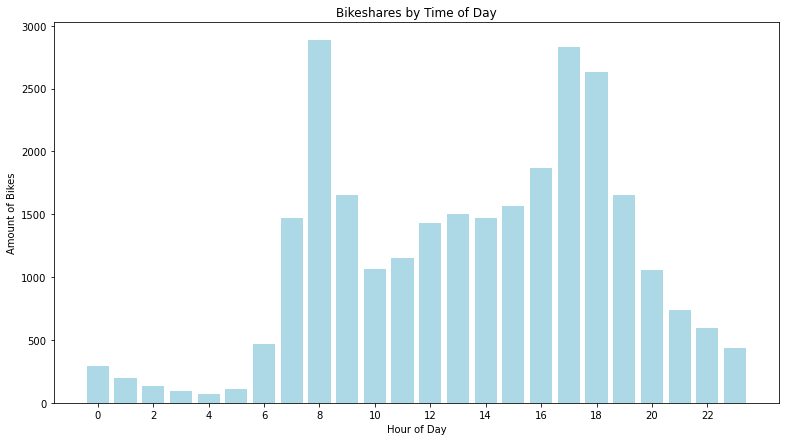

In [12]:
# Bikeshares by time of day 

bikes_hour = bikes.loc[:, ['hour', 'count bikes']]
bikes_hour_mean = bikes_hour.groupby('hour').mean()['count bikes'].round(2)

# Plot the above results 
plt.figure(figsize = (13,7))
plt.bar(bikes_hour_mean.index, bikes_hour_mean, color = 'lightblue')

plt.title('Bikeshares by Time of Day')
plt.xlabel('Hour of Day')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.ylabel('Amount of Bikes')

In [13]:
# EXPLANATION FOR THE BAR GRAPH 

Text(0, 0.5, 'Avg. Number of BikeShares')

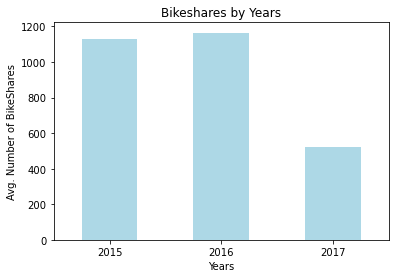

In [14]:
# Bikeshares by year 

bikes_year = bikes.loc[: , ['year', 'count bikes']]
bikes_year_mean = bikes_year.groupby('year').mean()['count bikes']

bikes_year_mean.plot(kind='bar', color = 'lightblue')

plt.title("Bikeshares by Years")

plt.xlabel("Years")
plt.xticks(rotation = 0)
plt.ylabel("Avg. Number of BikeShares")

<AxesSubplot:xlabel='year'>

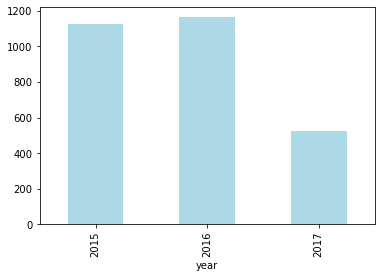

In [15]:
bikes_year = bikes.loc[: , ['year', 'count bikes']]
bikes_year_mean = bikes_year.groupby('year').mean()['count bikes']
bikes_year_mean.plot(kind='bar', color = 'lightblue')
#years = bikes['year'].unique()

#bikes_year_mean = bikes_year_mean.reindex(index = years)



#bikes_weekends = bikes.groupby(weekend).mean()['count bikes']

#bikes_weekends.plot(kind='bar', color = 'lightblue')


Text(0, 0.5, 'Average Amount of BikeShares')

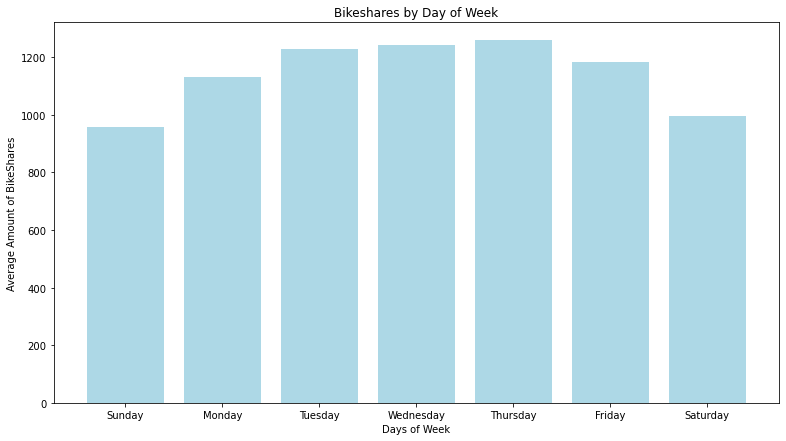

In [16]:
# Bikeshares by day of week

bikes_day = bikes.loc[: , ['day name', 'count bikes']]
bikes_day_mean = bikes_day.groupby('day name').mean()['count bikes'].round(2)

days = bikes['day name'].unique()

bikes_day_mean = bikes_day_mean.reindex(index = days)

plt.figure(figsize=(13,7))
plt.bar(bikes_day_mean.index, bikes_day_mean, color = 'lightblue')

plt.title("Bikeshares by Day of Week")
plt.xlabel("Days of Week")
plt.ylabel("Average Amount of BikeShares")

In [17]:
# EXPLANATION HERE ABOUT THE ABOVE GRAPH 

Text(0.5, 1.0, 'Bikeshares by weekdays')

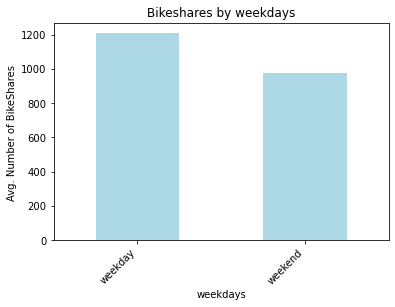

In [18]:
# Difference between weekends and other days 

# Just don't forget what this column is before we deep into this
# weekend time: A binary value indicating whether or not the day is a weekend

#weekends_or_not = bikes['weekend time'].unique()

#weekend = bikes['weekend time'].value_counts()
weekend = bikes['weekend time'].map({ 0 : 'weekday' , 1 : 'weekend'})

bikes_weekends = bikes.groupby(weekend).mean()['count bikes']

bikes_weekends.plot(kind='bar', color = 'lightblue')

plt.xlabel("weekdays")
plt.xticks(rotation=45,ha='right')

plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by weekdays")

In [19]:
# EXPLANATION HERE ABOUT THE ABOVE GRAPH 

Text(0.5, 1.0, 'Bikeshares by weekdays')

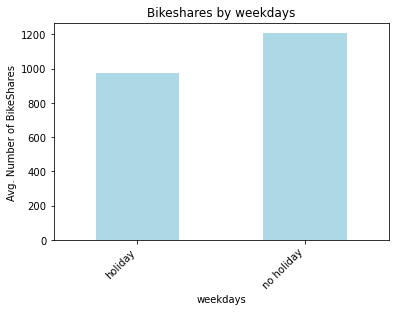

In [20]:
# Plot holidays vs working days
# "is_holiday" - boolean field - 1 holiday / 0 non holiday

holidays = bikes['weekend time'].map({ 0 : 'no holiday' , 1 : 'holiday'})

bikes_holidays = bikes.groupby(holidays).mean()['count bikes']

bikes_holidays.plot(kind='bar', color = 'lightblue')

plt.xlabel("weekdays")
plt.xticks(rotation=45,ha='right')

plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by weekdays")

Text(0.5, 1.0, 'Bikeshares by season')

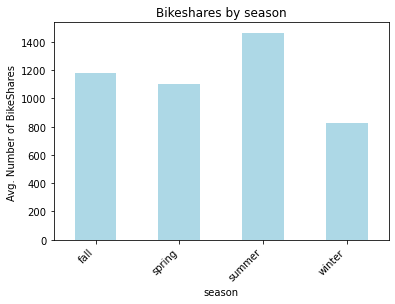

In [21]:
# Plot season vs Avg. Number of BikeShares
# "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

#bikes['season code'].value_counts()
seasons = bikes['season code'].map({0:"spring", 1:"summer", 2:"fall", 3:"winter"})

seasons = bikes.groupby(seasons).mean()['count bikes']

seasons.plot(kind='bar', color = 'lightblue')
plt.xlabel("season")
plt.xticks(rotation=45,ha='right')
plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by season")

Text(0.5, 0.98, 'Bikeshares by Month')

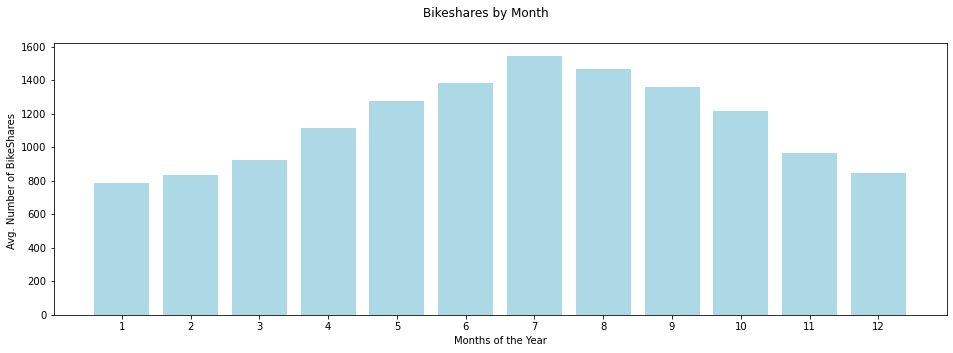

In [22]:
# Plot month vs Avg. Number of BikeShares
months = bikes.groupby(bikes['month']).mean()['count bikes']
                       
plt.figure(figsize=(16,5))
plt.bar(months.index, months, color = 'lightblue')

plt.xlabel("Months of the Year")
plt.ylabel("Avg. Number of BikeShares ")
plt.xticks(bikes['month'].unique())
plt.suptitle("Bikeshares by Month")

### Weather

Text(0.5, 1.0, 'Bikeshares by Weather condition')

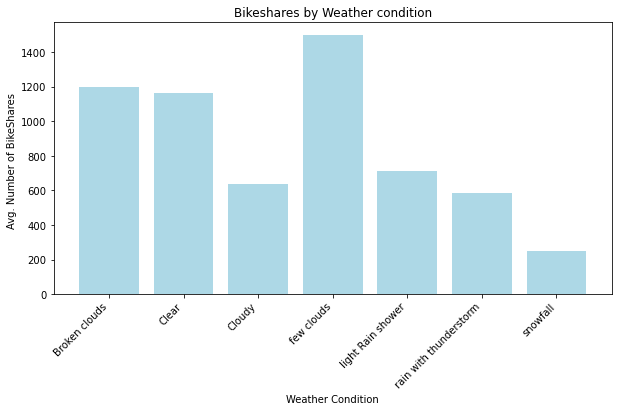

In [23]:
#Bikeshares by Weather condition
# Before we deep more into just remember the following 

# "weather code" category description:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain
# 10 = rain with thunderstorm
# 26 = snowfall
# 94 = Freezing Fog

bikes['weather code'] = bikes['weather code'].map({1:"Clear", 2:"few clouds", 3:"Broken clouds", 
                                                   4:"Cloudy", 7:"light Rain shower",
                                                   10:"rain with thunderstorm", 26:"snowfall", 
                                                   94:"Freezing Fog"})

bikes_weather = bikes.groupby(['weather code']).mean()['count bikes'].round()


plt.figure(figsize=(10,5))
plt.bar(bikes_weather.index, bikes_weather, color = 'lightblue')
plt.xlabel("Weather Condition")
plt.ylabel("Avg. Number of BikeShares ")
plt.xticks(rotation=45,ha='right')
plt.title("Bikeshares by Weather condition")

In [24]:
# Use the dummies in order to help our future model

#weather_dummies = pd.get_dummies(bikes['weather code'], prefix = 'weather')
#bikes = pd.concat([bikes, weather_dummies], axis = 1)
#bikes = bikes.drop('weather code', axis = 1)
#bikes.head()

In [25]:
# The max temperature in our dataset 

maxtemp = bikes['real temp'].max()
feelmax = bikes['feel temp'].max()
print(f'The max temperature in our dataset is {maxtemp} and we would feel it like it was {feelmax}')

The max temperature in our dataset is 34.0 and we would feel it like it was 34.0


In [26]:
# The min temperature in our dataset 

mintemp = bikes['real temp'].min()
feelmin = bikes['feel temp'].min()
print(f'The min temperature in our dataset is {mintemp} and we would feel it like it was {feelmin}')

The min temperature in our dataset is -1.5 and we would feel it like it was -6.0


In [27]:
bikes['real temp'].describe()

count    17414.000000
mean        12.468091
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: real temp, dtype: float64

In [28]:
bikes.max()

count bikes          7860
real temp            34.0
feel temp            34.0
humidity (%)        100.0
wind (km/h)          56.5
weather code     snowfall
holiday time          1.0
weekend time          1.0
season code           3.0
year                 2017
month                  12
day                    31
hour                   23
day name        Wednesday
day num                 6
dtype: object

In [29]:
bikes['feel temp'].describe()

count    17414.000000
mean        11.520836
std          6.615145
min         -6.000000
25%          6.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: feel temp, dtype: float64

In [30]:
bikes.min()

count bikes                 0
real temp                -1.5
feel temp                -6.0
humidity (%)             20.5
wind (km/h)               0.0
weather code    Broken clouds
holiday time              0.0
weekend time              0.0
season code               0.0
year                     2015
month                       1
day                         1
hour                        0
day name               Friday
day num                     0
dtype: object

In [31]:
#seleting row with max humidity
#we can see when the humidity is high bike count is low

bikes[bikes['humidity (%)'] == bikes['humidity (%)'].max()].max()

count bikes          4386
real temp            15.0
feel temp            15.0
humidity (%)        100.0
wind (km/h)          16.0
weather code     snowfall
holiday time          1.0
weekend time          1.0
season code           3.0
year                 2016
month                  12
day                    31
hour                   23
day name        Wednesday
day num                 6
dtype: object

In [32]:
#bikes.iloc[bikes['humidity (%)'].idxmin()]

<AxesSubplot:xlabel='hour', ylabel='count bikes'>

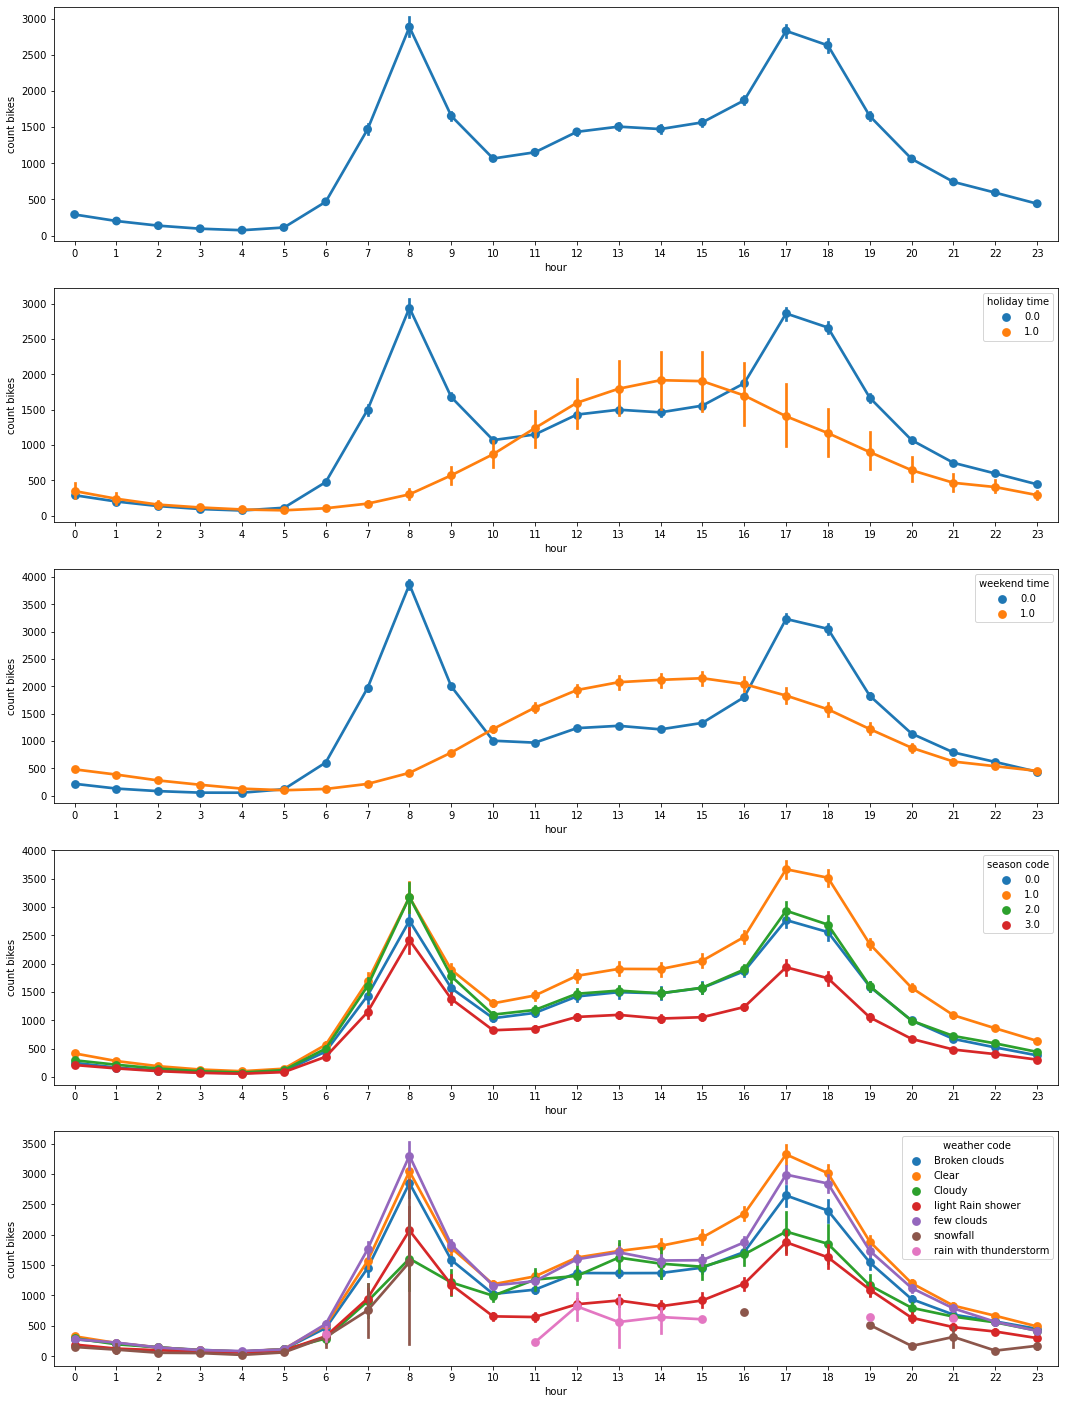

In [33]:
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=bikes, x='hour', y='count bikes',                     ax=ax1)
sns.pointplot(data=bikes, x='hour', y='count bikes', hue='holiday time', ax=ax2)
sns.pointplot(data=bikes, x='hour', y='count bikes', hue='weekend time', ax=ax3)
sns.pointplot(data=bikes, x='hour', y='count bikes', hue='season code',  ax=ax4)
sns.pointplot(data=bikes, x='hour', y='count bikes', hue='weather code', ax=ax5)

#### It is a very interesting result.

* First, when it comes to holidays, commuting time is clearly visible when it's not a holiday, while the most people use it for lunch when it's a holiday. This shows a similar trend over the weekend.
* Second, if you look at the season, it looks like the weather is good summer - fall - spring - winter.
* Thirdly, by weather, the more loans are made for the better weather, and when it rains, there are few.

However, unlike rain, when it snows, there are people who rent during rush hour.

### Huminitydescribe

### Split the data into train and test set

In [36]:
# We want to predict the count_bikes against the rest dataset 
# First we must split the data and only then we can use standar scaler

y = bikes['count bikes']
X = bikes.drop('count bikes', axis = 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

### Standrar Scaler

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

ValueError: could not convert string to float: 'Clear'

In [38]:
X_train.head()

,real temp,feel temp,humidity (%),wind (km/h),weather code,holiday time,weekend time,season code,year,month,day,hour,day name,day num
12059,13.5,13.5,65.0,18.0,Clear,0.0,0.0,0.0,2016,5,23,8,Monday,0
4870,14.0,14.0,88.0,16.0,Broken clouds,0.0,1.0,1.0,2015,7,26,13,Sunday,6
11820,14.5,14.5,74.5,17.0,few clouds,0.0,0.0,0.0,2016,5,13,9,Friday,4
14753,19.5,19.5,71.0,0.0,Clear,0.0,0.0,2.0,2016,9,15,1,Thursday,3
4045,14.5,14.5,72.5,19.5,light Rain shower,0.0,0.0,1.0,2015,6,22,0,Monday,0


In [39]:
y_train

12059    4640
4870      602
11820    2509
14753     208
4045      260
         ... 
11284     100
11964    2366
5390      139
860       334
15795    1392
Name: count bikes, Length: 13931, dtype: int64

&emsp;   

adasdasdasdasda

In [ ]:
# bikes.astype(int)